Задание 1: В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

Пример результата с подсказкой содержит изображение railway_result.png.

Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.


In [68]:
import sys

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

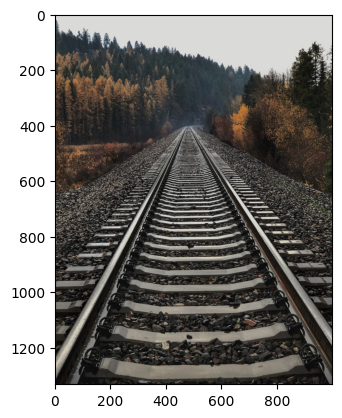

In [69]:
image = cv.imread("railway.jpeg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

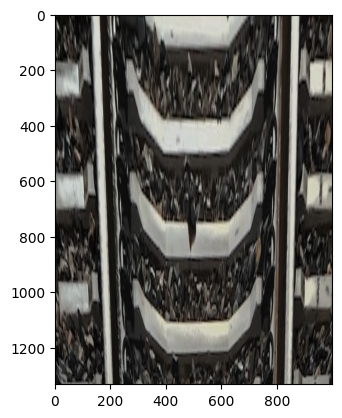

In [70]:
h, w = image.shape[:2]
points_obj = [[180, 780],[820, 770],[20, 910],[980, 900]]
points_all = [[0, 0], [w, 0], [0, h], [w, h]]
M = cv.getPerspectiveTransform(np.float32(points_obj), np.float32(points_all))
img_res = cv.warpPerspective(image, M, (w, h))

plt.imshow(img_res, cmap="gray")

Задание 2: В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png

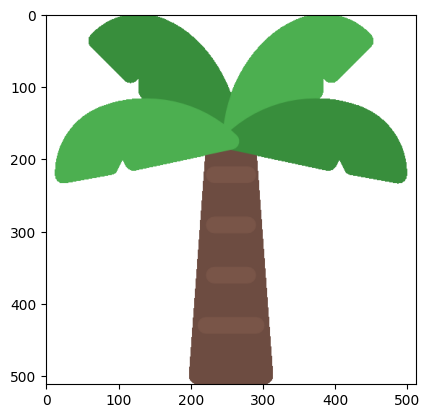

In [71]:
palm = cv.imread("palm.png")
palm = cv.cvtColor(palm, cv.COLOR_BGR2RGB)

plt.imshow(palm)

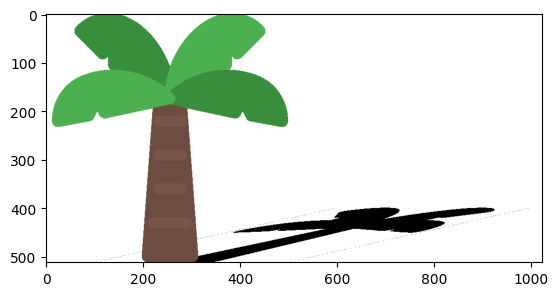

In [72]:
h, w = palm.shape[:2]
w *= 2
points_obj = [[0, 0], [512, 0], [0, 512], [512, 512]]
points_all = [[600, 400], [1000, 400], [100, 512], [500, 512]]

M = cv.getPerspectiveTransform(np.float32(points_obj), np.float32(points_all))
palm_final = cv.warpPerspective(palm, M, (w, h))
palm_final = np.where(palm_final == 0, 255, palm_final)
palm_final = np.where(palm_final != 255, 0, palm_final)

for x in range(palm.shape[0]):
    for y in range(palm.shape[1]):
        if (palm[x,y] != 255).any():
            palm_final[x,y] = palm[x,y]

plt.imshow(palm_final, cmap="gray")